# **Lab Assignment Six: Convolutional Network Architectures**

Group members: Christina DeSantiago, Estefy Fiallos, Kaiying Li, Tianyu Li

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.



Data Source:

https://www.kaggle.com/kmader/colorectal-histology-mnist/home

# **Dataset Selection**

**Select a dataset identically to lab two (images). That is, the dataset must be image data. In terms of generalization performance, it is helpful to have a large dataset of identically sized images. It is fine to perform binary classification or multi-class classification.**



For this lab, we chose the Colorectal Histology MNIST dataset. This dataset consists of histological images of colorectal cancer, divided into 8 different tissue texture types: (a) tumour epithelium, (b) simple stroma, (c) complex stroma (stroma that contains single tumour cells and/or single immune cells), (d) lymphocytes, (e) debris and mucus, (f) mucosal glands, (g) adipose tissue, (h) background (no tissue). Each row represents a 64 x 64 greyscale image. The task is to correctly classify the eight categories of tissue texture types. 

Source for how to open Kaggle data in Google Colab using the Kaggle API:

Kaggle API access example.ipynb     https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tli123","key":"264cd596d761f5203f1ab431e7f02966"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Nov 26 04:58 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d kmader/colorectal-histology-mnist --force

 99% 984M/991M [00:07<00:00, 129MB/s]
100% 991M/991M [00:07<00:00, 130MB/s]


In [0]:
!ls /content

colorectal-histology-mnist.zip	kaggle.json  sample_data


In [0]:
!unzip colorectal-histology-mnist.zip

Archive:  colorectal-histology-mnist.zip
  inflating: hmnist_28_28_RGB.csv    
  inflating: hmnist_28_28_L.csv      
  inflating: hmnist_8_8_L.csv        
  inflating: Kather_texture_2016_image_tiles_5000.zip  
  inflating: Kather_texture_2016_larger_images_10.zip  
  inflating: hmnist_8_8_RGB.csv      
  inflating: hmnist_64_64_L.csv      


In [0]:
!ls /content

colorectal-histology-mnist.zip	hmnist_8_8_RGB.csv
hmnist_28_28_L.csv		kaggle.json
hmnist_28_28_RGB.csv		Kather_texture_2016_image_tiles_5000.zip
hmnist_64_64_L.csv		Kather_texture_2016_larger_images_10.zip
hmnist_8_8_L.csv		sample_data


# Data Processing

In [0]:
import pandas as pd
data2 = pd.read_csv('/content/hmnist_64_64_L.csv', header=0, sep=',', quotechar='"')

In [0]:
X=data2.copy()
del X["label"]
X.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
0,134,99,119,130,142,169,152,139,117,87,...,146,112,89,73,100,120,120,126,140,195
1,55,64,74,63,74,75,71,73,70,77,...,76,79,85,86,77,68,66,65,68,69
2,114,116,136,152,132,100,151,150,127,205,...,144,128,157,159,205,182,143,129,89,122
3,86,82,88,85,103,93,98,109,104,115,...,75,79,80,109,128,89,85,80,63,48
4,168,143,140,139,129,123,123,141,137,101,...,201,231,199,183,195,179,134,142,158,149


In [0]:
# normalize inputs from 0-255 to -0.5 to 0.5
X = X.astype('float32')
X = X / 255.0 - 0.5

X.head()


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel4086,pixel4087,pixel4088,pixel4089,pixel4090,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095
0,0.025490,-0.111765,-0.033333,0.009804,0.056863,0.162745,0.096078,0.045098,-0.041176,-0.158824,...,0.072549,-0.060784,-0.150980,-0.213725,-0.107843,-0.029412,-0.029412,-0.005882,0.049020,0.264706
1,-0.284314,-0.249020,-0.209804,-0.252941,-0.209804,-0.205882,-0.221569,-0.213725,-0.225490,-0.198039,...,-0.201961,-0.190196,-0.166667,-0.162745,-0.198039,-0.233333,-0.241176,-0.245098,-0.233333,-0.229412
2,-0.052941,-0.045098,0.033333,0.096078,0.017647,-0.107843,0.092157,0.088235,-0.001961,0.303922,...,0.064706,0.001961,0.115686,0.123529,0.303922,0.213726,0.060784,0.005882,-0.150980,-0.021569
3,-0.162745,-0.178431,-0.154902,-0.166667,-0.096078,-0.135294,-0.115686,-0.072549,-0.092157,-0.049020,...,-0.205882,-0.190196,-0.186274,-0.072549,0.001961,-0.150980,-0.166667,-0.186274,-0.252941,-0.311765
4,0.158824,0.060784,0.049020,0.045098,0.005882,-0.017647,-0.017647,0.052941,0.037255,-0.103922,...,0.288235,0.405882,0.280392,0.217647,0.264706,0.201961,0.025490,0.056863,0.119608,0.084314


In [0]:
import numpy as np
img_wh=64
X=np.asarray(X)

# NEW: Let's start by fixing the sizes
X = np.expand_dims(X.reshape((-1,img_wh,img_wh)), axis=3)
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

print('New Shape: Rows: %d, image size: (%d,%d,%d)' % (X.shape[0], X.shape[1], X.shape[2], X.shape[3] ))



New Shape: Rows: 5000, image size: (64,64,1)


In [0]:
#y data with labels
y=data2["label"].copy()
y.head()

0    2
1    2
2    2
3    2
4    2
Name: label, dtype: int64

In [0]:
#using encoder to change y values from 1-8 to 0-7

from sklearn.preprocessing import LabelEncoder
import numpy as np

# define objects that can encode each variable as integer    
encoders = dict() 
col='label'

# train all encoders 
# integer encoded variables
encoders = LabelEncoder() # save the encoder
data2[col+'_int'] = encoders.fit_transform(data2[col])
y=data2[col+'_int']

In [0]:
# add one hot encoding the output values
y_ohe = pd.get_dummies(y)
y_ohe.head()

,0,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [0]:
import numpy as np

#image classes
NUM_CLASSES = 8 
class_names = ['tumor','stroma','complex','lympho',
               'debris','mucosa','adipose','background']
class_names = np.asarray(class_names)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/colorbar.py:218: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


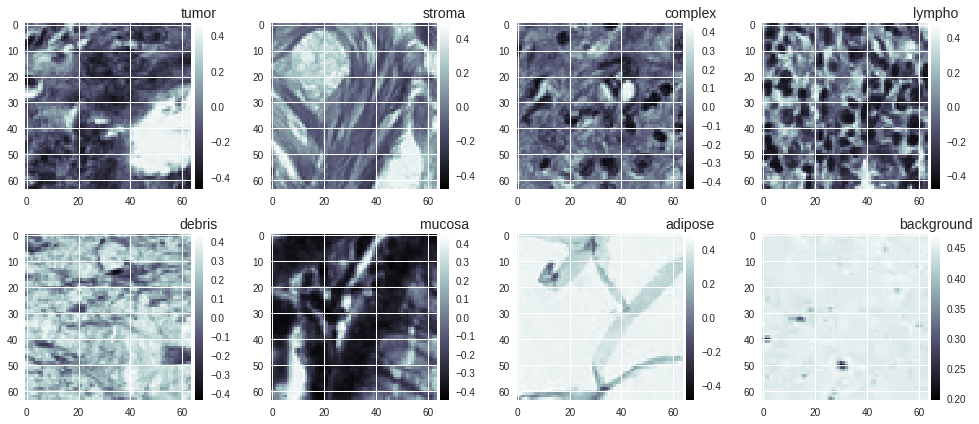

In [0]:
#example of an image from each class
from matplotlib import pyplot as plt

#source code: ML Notebook #4 plot_gallery function
def plot_gallery(images, titles, h, w, n_row=2, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(14, 6))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(8):
        plt.subplot(n_row, n_col, i + 1)
        idx = np.where(y[:]==i)[0]
        features_idx = images[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        idx2=idx[img_num]
        imshow(X[idx2].squeeze(),cmap='bone')
        plt.title(titles[i], size=14)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, class_names, img_wh, img_wh) 

# Preparation (30 points total)

**[15 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance. **




The business task for this dataset is to correctly classify each of the eight categories of tissue textures. Colorectal tumors consist of several different types of tissue, and the tissue architecture changes during tumor progression. Histological tissue samples are currently analyzed manually. Developing an image processing algorithm for classification would provide a high-throughput analysis of the tissue samples, which could reduce costs, save time for clinicians, and provide a more quantitative assessment of tissue types. According to Kather et al., this type of algorithm could be used for tumor grading, which can be used to predict patients' prognosis and guide treatment. 

We will use F1-score and accuracy to evaluate the algorithm's performance. For this classification task, we want to evaluate false positives, false negatives, true positives, and true negatives since any type of misclassification would have negative implications. Incorrect classifications would lead to incorrect patient prognosis and possibly inadequate treatment recommendations. Therefore, we are striving for high accuracy and F1 scores for our model. In a medical setting, there is not much room for error so scores of 95% and above would be ideal in order to be considered for deployment. 


Source: Kather, Jakob Nikolas, et al. “Multi-Class Texture Analysis in Colorectal Cancer Histology.” Scientific Reports, vol. 6, no. 1, 2016, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4910082/

**[15 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice. **

We will use K-fold cross validation to divide our data because K-fold generally provides a less biased estimate of model performance than other methods, and we have no class imbalance.  Ideally, we would use 10-fold cross validation since it has been shown to give a good bias-variance trade-off, but we will only use 3-folds due to time constraints. K-fold cross validation works well for small/medium datasets, which is our case at 5000 images, and we expect that this algorithm would be used with similarly-sized datasets in practice. 

In [0]:
#using kfold for cv 
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=15)  #15 
kf.get_n_splits(X,y_ohe)

print(kf)

for train_index, test_index in kf.split(X,y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]
    


KFold(n_splits=3, random_state=15, shuffle=True)


In [0]:
print(y_test_ohe.shape, y_test.shape)

(1666, 8) (1666,)


# Modeling (60 points total)











In [0]:
#load required packages
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import average 
from keras.models import Input, Model

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [0]:
#define f1 score 
import keras.backend as K
def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [0]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    f1 = mt.f1_score(y_test, yhat, average='macro')
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.title(title_text+'{:.4f}'.format(acc))
    print('F1_score: ' + str(np.round(f1, 3)))
    print('Accuracy: ' + str(np.round(acc, 3)))    

**[15 points] Create a convolutional neural network to use on your data using Keras. Setup the training to use data expansion in Keras. Explain why the chosen data expansion techniques are appropriate for your dataset.**

##Data Expansion

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None)

For data expansion, we used rotation, width and height shifts, and vertical and horizontal flips. Our images are from histological tissue samples, which don't have a "right" orientation. The data expansion techniques we chose would allow the algorithm to learn from different orientations it may encounter. 

##AlexNet v.1 with expansion

In [0]:
def alexnet_model():
  cnn = Sequential()

  # let's start with an AlexNet style convolutional phase
  cnn.add(Conv2D(filters=32,
                  input_shape = (img_wh,img_wh,1),
                  kernel_size=(3,3), 
                  padding='same', 
                  activation='relu', data_format="channels_last")) # more compact syntax

  # no max pool before next conv layer!!
  cnn.add(Conv2D(filters=64,
                  kernel_size=(3,3), 
                  padding='same', 
                  activation='relu')) # more compact syntax
  cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))


  # add one layer on flattened output
  cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
  cnn.add(Flatten())
  cnn.add(Dense(128, activation='relu'))
  cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
  cnn.add(Dense(NUM_CLASSES, activation='softmax'))
  return cnn


In [0]:

cnn = alexnet_model()

# Let's train the model 
cnn.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1_score])  

# the flow method yields batches of images indefinitely, with the given transformations
history_Alex=cnn.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                   steps_per_epoch=int(len(X_train)/128), # how many generators to go through per epoch
                   epochs=10, verbose=2,
                   validation_data=(X_test,y_test_ohe)
                  )

Epoch 1/10
 - 3s - loss: 1.7821 - acc: 0.3284 - f1_score: nan - val_loss: 1.1773 - val_acc: 0.5024 - val_f1_score: nan
Epoch 2/10
 - 2s - loss: 1.3451 - acc: 0.4371 - f1_score: nan - val_loss: 1.0964 - val_acc: 0.6321 - val_f1_score: nan
Epoch 3/10
 - 2s - loss: 1.1776 - acc: 0.5164 - f1_score: 0.3972 - val_loss: 0.9597 - val_acc: 0.6939 - val_f1_score: nan
Epoch 4/10
 - 2s - loss: 1.1617 - acc: 0.5512 - f1_score: 0.4610 - val_loss: 0.9601 - val_acc: 0.5642 - val_f1_score: nan
Epoch 5/10
 - 2s - loss: 1.0883 - acc: 0.5795 - f1_score: 0.4925 - val_loss: 1.0050 - val_acc: 0.5942 - val_f1_score: nan
Epoch 6/10
 - 2s - loss: 1.0281 - acc: 0.5940 - f1_score: 0.5196 - val_loss: 0.8993 - val_acc: 0.6561 - val_f1_score: nan
Epoch 7/10
 - 2s - loss: 0.9741 - acc: 0.6261 - f1_score: 0.5618 - val_loss: 0.8828 - val_acc: 0.6813 - val_f1_score: nan
Epoch 8/10
 - 2s - loss: 0.9718 - acc: 0.6318 - f1_score: 0.5747 - val_loss: 1.2656 - val_acc: 0.5042 - val_f1_score: nan
Epoch 9/10
 - 2s - loss: 0.941

F1_score: 0.629
Accuracy: 0.65


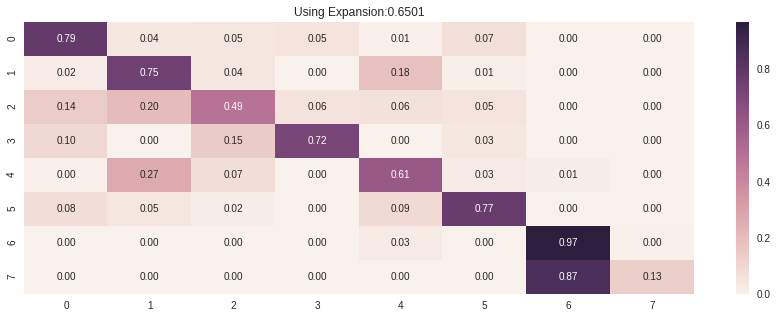

In [0]:
summarize_net(cnn, X_test, y_test, title_text='Using Expansion:')


Using an AlexNet model, we only achieve an accuracy of 65% and F1 score of 63%. The majority of the misclassifications occur in groups 2 (complex tissue) and 7 (background). With such low metrics, this model does not perform well enough to be deployed.

**[20 points] Investigate at least two different convolutional network architectures (and investigate changing some parameters of each architecture). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). **

In [0]:
#using kfold for cv 
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=15)  #15 
kf.get_n_splits(X,y_ohe)

print(kf)
X_train_list, X_test_list,y_train_ohe_list, y_test_ohe_list, y_train_list, y_test_list = [], [], [],[],[],[]

for train_index, test_index in kf.split(X,y_ohe):
    X_train, X_test = X[train_index], X[test_index]
    y_train_ohe, y_test_ohe = y[train_index], y[test_index]
    
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_ohe = pd.get_dummies(y_train_ohe)
    y_test_ohe = pd.get_dummies(y_test_ohe)
    
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_ohe_list.append(y_train_ohe)
    y_test_ohe_list.append(y_test_ohe)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

KFold(n_splits=3, random_state=15, shuffle=True)


In [0]:
#function to plot history of the model

#source code from https://www.tensorflow.org/tutorials/keras/basic_regression?fbclid=IwAR1qVx-2N7V32MwLwws5wZf6QBW5WVlpBa-JXS262kLo8hOEPFH1Bue1GKY
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure(figsize=(12,4))
  plt.subplot(1,3,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train ')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Val ')
  plt.legend()
  
  plt.subplot(1,3,2)
  plt.xlabel('Epoch')
  plt.ylabel('F1 score')
  plt.plot(history.epoch, np.array(history.history['f1_score']),
           label = 'Train')
  plt.plot(history.epoch, np.array(history.history['val_f1_score']),
           label = 'Val ')
  plt.legend()
  
  plt.subplot(1,3,3)
  plt.xlabel('Epoch')
  plt.ylabel('MSE Loss')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label = 'Train')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val ')
  plt.legend()
  



##AlexNet v.2 using expansion

Changed parameters: added 2 convolutional layers and one max pool layer. Also increased epochs from 10 to 20.

In [0]:
#create function for an AlexNet model
%%time
def alexnet2_model():
  cnn2 = Sequential()

  # let's start with an AlexNet style convolutional phase
  cnn2.add(Conv2D(filters=32,
                  input_shape = (img_wh,img_wh,1),
                  kernel_size=(3,3),
                  padding='same', 
                  activation='relu', data_format="channels_last")) # more compact syntax

  # no max pool before next conv layer!!
  cnn2.add(Conv2D(filters=64,
                  kernel_size=(3,3), 
                  padding='same', 
                  activation='relu')) # more compact syntax
  cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

  #Add 2 extra Conv and Max Pool layers
  cnn2.add(Conv2D(filters=128,
                  kernel_size=(3,3), 
                  padding='same', 
                  activation='relu')) # more compact 
  cnn2.add(Conv2D(filters=128,
                  kernel_size=(3,3), 
                  padding='same', 
                  activation='relu')) # more compact syntax
  cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

  # add one layer on flattened output
  cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
  cnn2.add(Flatten())
  cnn2.add(Dense(128, activation='relu'))
  cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
  cnn2.add(Dense(NUM_CLASSES, activation='softmax'))
  return cnn2



CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


In [0]:
#use cross validation to fit model
hist=[]
accs=[]
f1s=[]
for j in range(3):  
  cnn2 = alexnet2_model()

  # Let's train the model 
  cnn2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy',f1_score]) 

  # the flow method yields batches of images indefinitely, with the given transformations
  history_Alex2=cnn2.fit_generator(datagen.flow(X_train_list[j], y_train_ohe_list[j], batch_size=128), 
                   steps_per_epoch=int(len(X_train_list[j])/128), # how many generators to go through per epoch
                   epochs=20, verbose=0,
                   validation_data=(X_test_list[j],y_test_ohe_list[j])
                  )
  
  hist.append(history_Alex2)
  yhat=np.argmax(cnn2.predict(X_test_list[j]), axis=1)
  acc = mt.accuracy_score(y_test_list[j],yhat)
  accs.append(acc)
  f1 = mt.f1_score(y_test_list[j], yhat, average='macro')
  f1s.append(f1)
  


In [0]:
#model evaluation
print("Accuracy score per fold:", accs)
print("F1 score per fold:", f1s)
print("Mean Accuracy", np.round(np.mean(accs),3))
print("Mean F1:", np.round(np.mean(f1s),3))

Accuracy score per fold: [0.7798440311937612, 0.7438512297540492, 0.776110444177671]
F1 score per fold: [0.7821360787959823, 0.7415738130398812, 0.768008374778179]
Mean Accuracy 0.767
Mean F1: 0.764


F1_score: 0.768
Accuracy: 0.776


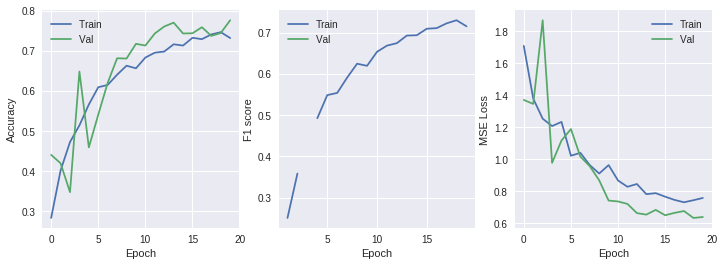

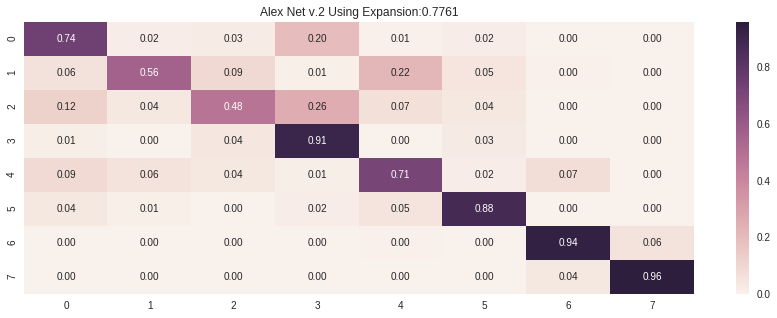

In [0]:
#visualize the last fold
plot_history(history_Alex2)
summarize_net(cnn2, X_test, y_test, title_text='Alex Net v.2 Using Expansion:')

By adding more convolution layers and running for more epochs, this version of AlexNet performs better than the previous version. The error in misclassification for group 7 has been corrected, but group 2 still has a low accuracy. For 3 folds, we have a mean accuracy of 76.7% and mean F1 score of 76.4%. Even though this model is much improved, it still does not perform well enough to be deployed.

##ResNet v.1 (no image expansion)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Add
from keras.layers import average, concatenate
from keras.models import Input, Model

l2_lambda = 0.0001

In [0]:
%%time
def resnet_model():
  # now lets use the LeNet architecture with batch norm
  # We will also use ReLU where approriate and drop out 
  from keras.layers.normalization import BatchNormalization
  from keras.layers import Add
  from keras.layers import average, concatenate
  from keras.models import Input, Model

  input_holder = Input(shape=(img_wh, img_wh, 1))

  # start with a conv layer
  x = Conv2D(filters=32,
                 input_shape = (img_wh,img_wh,1),
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(input_holder)

  x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Conv2D(filters=32,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Conv2D(filters=64,
                 kernel_size=(1,1),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x_split)

  x = Conv2D(filters=64,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  x = Conv2D(filters=32,
                 kernel_size=(1,1),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  # now add back in the split layer, x_split (residual added in)
  x = Add()([x, x_split])
  x = Activation("relu")(x)

  x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Flatten()(x)
  x = Dropout(0.25)(x)
  x = Dense(256)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)
  x = Dense(NUM_CLASSES)(x)
  x = Activation('softmax')(x)

  resnet = Model(inputs=input_holder,outputs=x)
  return resnet




CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


In [0]:
#use cross validation to fit model
hist=[]
accs=[]
f1s=[]
for j in range(3):
  resnet = resnet_model()

  # Let's train the model 
  resnet.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_score]) 
  
  #not using image expansion
  history_resnet= resnet.fit(X_train_list[j], y_train_ohe_list[j], batch_size=128, 
                      epochs=50, verbose=1,
                      validation_data=(X_test_list[j],y_test_ohe_list[j]),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

  # the flow method yields batches of images indefinitely, with the given transformations
  #history_resnet=resnet.fit_generator(datagen.flow(X_train_list[j], y_train_ohe_list[j], batch_size=128), 
   #                steps_per_epoch=int(len(X_train_list[j])/128), # how many generators to go through per epoch
    #               epochs=50, verbose=1,
     #              validation_data=(X_test_list[j],y_test_ohe_list[j]),
      #             callbacks=[EarlyStopping(monitor='val_loss', patience=4)]                    
       #           )
  
  hist.append(history_resnet)
  yhat=np.argmax(resnet.predict(X_test_list[j]), axis=1)
  acc = mt.accuracy_score(y_test_list[j],yhat)
  accs.append(acc)
  f1 = mt.f1_score(y_test_list[j], yhat, average='macro')
  f1s.append(f1)
  


In [0]:
#model evaluation
print("Accuracy score per fold:", accs)
print("F1 score per fold:", f1s)
print("Mean Accuracy", np.round(np.mean(accs),3))
print("Mean F1:", np.round(np.mean(f1s),3))

Accuracy score per fold: [0.8230353929214157, 0.8014397120575885, 0.7983193277310925]
F1 score per fold: [0.8203899557557176, 0.7981376345827401, 0.7937271057721201]
Mean Accuracy 0.808
Mean F1: 0.804


F1_score: 0.794
Accuracy: 0.798


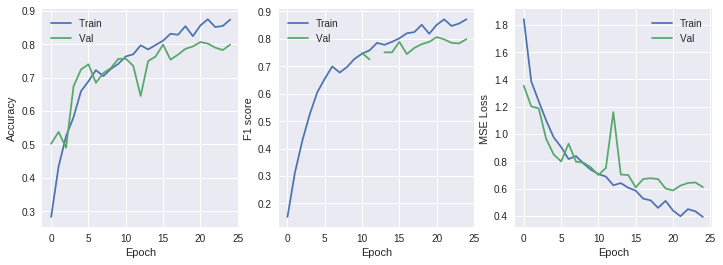

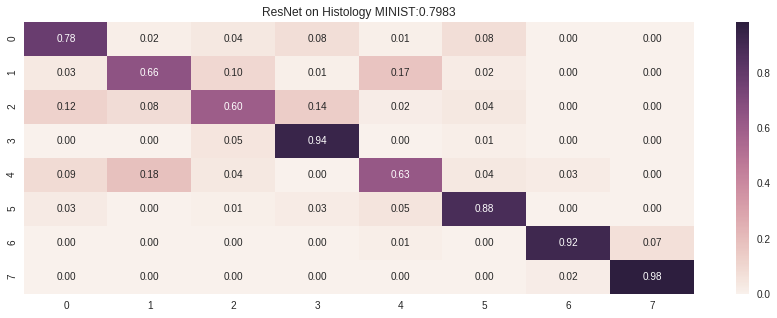

In [0]:
#visualize last fold
plot_history(history_resnet)
summarize_net(resnet, X_test, y_test, title_text='ResNet on Histology MINIST:')


For our second model architecture, we chose to look at a ResNet model. For each of the folds, the accuracy and F1 scores were higher than those of the AlexNet models. The mean accuracy was 80.8% and mean F1 score was 80.4%. When visualizing the performance of the last fold, we see that classes 1(stroma), 2(complex), and 4 (debris) are the most misclassified.

##ResNet v.2  (no image expansion)

Changed parameters : added 2 convolutional layers

In [0]:
%%time 

def resnet2_model():
  # now lets use the LeNet architecture with batch norm
  # We will also use ReLU where approriate and drop out 
  from keras.layers.normalization import BatchNormalization
  from keras.layers import Add
  from keras.layers import average, concatenate
  from keras.models import Input, Model

  input_holder = Input(shape=(img_wh, img_wh, 1))

  # start with a conv layer
  x = Conv2D(filters=32,
                 input_shape = (img_wh,img_wh,1),
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(input_holder)

  x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Conv2D(filters=32,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  x_split = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Conv2D(filters=64,
                 kernel_size=(1,1),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x_split)

  x = Conv2D(filters=64,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  #add two extra Conv layers
  x = Conv2D(filters=128,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  x = Conv2D(filters=64,
                 kernel_size=(3,3),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  x = Conv2D(filters=32,
                 kernel_size=(1,1),
                 kernel_initializer='he_uniform', 
                 kernel_regularizer=l2(l2_lambda),
                 padding='same', 
                 activation='relu', 
                 data_format="channels_last")(x)

  # now add back in the split layer, x_split (residual added in)
  x = Add()([x, x_split])
  x = Activation("relu")(x)

  x = MaxPooling2D(pool_size=(2, 2), data_format="channels_last")(x)

  x = Flatten()(x)
  x = Dropout(0.25)(x)
  x = Dense(256)(x)
  x = Activation("relu")(x)
  x = Dropout(0.5)(x)
  x = Dense(NUM_CLASSES)(x)
  x = Activation('softmax')(x)

  resnet2 = Model(inputs=input_holder,outputs=x)
  return resnet2



In [0]:
#use cross validation to fit model
hist=[]
accs=[]
f1s=[]
for j in range(3):
  resnet2 = resnet2_model()

  # Let's train the model 
  resnet2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_score]) 
  
  history_resnet2= resnet2.fit(X_train_list[j], y_train_ohe_list[j], batch_size=128, 
                      epochs=50, verbose=1,
                      validation_data=(X_test_list[j],y_test_ohe_list[j]),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

  # the flow method yields batches of images indefinitely, with the given transformations
  #history_resnet2=resnet2.fit_generator(datagen.flow(X_train_list[j], y_train_ohe_list[j], batch_size=128), 
   #                steps_per_epoch=int(len(X_train_list[j])/128), # how many generators to go through per epoch
    #               epochs=50, verbose=1,
     #              validation_data=(X_test_list[j],y_test_ohe_list[j]),
      #             callbacks=[EarlyStopping(monitor='val_loss', patience=4)]                    
       #           )
  
  hist.append(history_resnet2)
  yhat=np.argmax(resnet2.predict(X_test_list[j]), axis=1)
  acc = mt.accuracy_score(y_test_list[j],yhat)
  accs.append(acc)
  f1 = mt.f1_score(y_test_list[j], yhat, average='macro')
  f1s.append(f1)
  


In [0]:
#evaluate model
print("Accuracy score per fold:", accs)
print("F1 score per fold:", f1s)
print("Mean Accuracy", np.round(np.mean(accs),3))
print("Mean F1:", np.round(np.mean(f1s),3))

Accuracy score per fold: [0.8014397120575885, 0.7870425914817036, 0.7929171668667467]
F1 score per fold: [0.7967368145047338, 0.7902159071860848, 0.7830008064597713]
Mean Accuracy 0.794
Mean F1: 0.79


F1_score: 0.783
Accuracy: 0.793


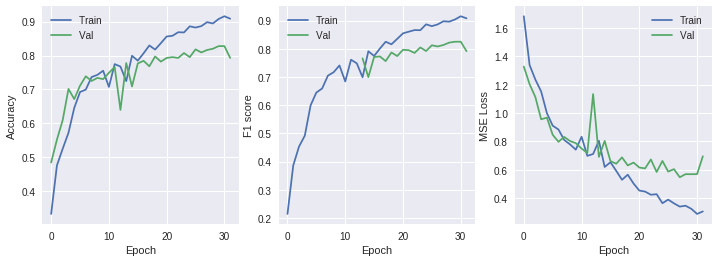

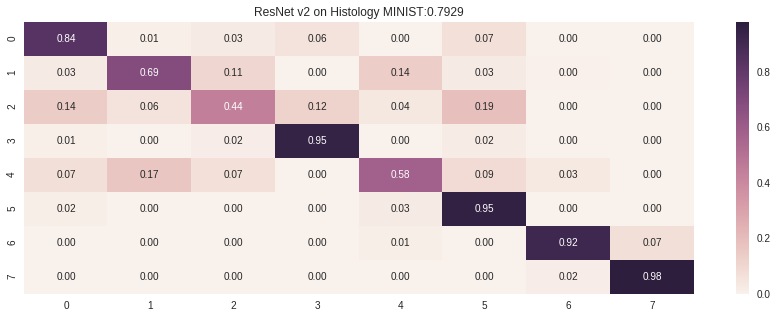

In [0]:
#visualize last fold
plot_history(history_resnet2)
summarize_net(resnet2, X_test, y_test, title_text='ResNet v2 on Histology MINIST:')


Adding more convolutions to the ResNet model architecture did not improve or even make much of a difference in performance when comparing with the previous version. The mean accuracy was 79.4% and mean F1 score was 79.0% for the 3 folds. When visualizing the last fold, we see that class 2(complex) was misclassified the most.

When comparing all of these different model architectures, the ResNet v.1 is the best performing model. This model had the highest mean accuracy and F1 scores, both around 80%. However, these scores are still not high enough that we would be confident deploying this model. We want to strive for higher accuracy and F1 scores in the model we deploy, since misclassifications of any kind have a huge impact in this scenario.

# Compare CNNs

**[15 points] Visualize the final results of the CNNs and interpret the performance. Use proper statistics as appropriate, especially for comparing models.**

We will use the McNemar Test to compare performance between AlexNet v.2 and ResNet v.1

In [0]:
#Import mlxtend

!pip install -q mlxtend

[[868 407]
 [ 79 312]]
chi-squared: 220.0185185185185
p-value: 8.96074731547948e-50


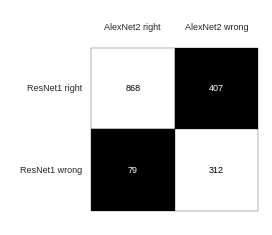

In [0]:
#Code from http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/

#McNemar Test

import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

# Class labels predicted by model 1
yhat_alex = np.argmax(cnn2.predict(X_test), axis=1)

# Class labels predicted by model 2
yhat_res = np.argmax(resnet.predict(X_test), axis=1)

tb = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_alex, 
                   y_model2=yhat_res)

print(tb)

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)


brd = checkerboard_plot(tb,
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['AlexNet2 right', 'AlexNet2 wrong'],
                        row_labels=['ResNet1 right', 'ResNet1 wrong'])
plt.show()

According to the McNemar Test, we can reject the null hypothesis that the two models perform equally well on this dataset at a significance level of alpha=0.05. We conclude that the ResNet model performs better on this dataset. 

# Compare to MLP

**[10 points] Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques.**

In [0]:
# make a 3 layer keras MLP

def mlp_mod():

  %%time

  mlp = Sequential()
  mlp.add( Reshape((64*64,1), input_shape=(64,64,1))) 
  mlp.add( Flatten())
  #mlp.add( Dense(input_dim=64*64, units=30, activation='relu') )
  mlp.add( Dense(units=30, activation='relu') )
  mlp.add( Dense(units=15, activation='relu') )
  mlp.add( Dense(NUM_CLASSES) )
  mlp.add( Activation('softmax') )
  return mlp

mlp = mlp_mod()

mlp.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', f1_score])

mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)


CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 18.6 µs


In [0]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        f1_cnn = mt.f1_score(y_test, yhat_cnn, average='macro')
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f')
        plt.title('CNN: '+'\nF1_score: ' + str(np.round(f1_cnn, 3))+'\nAccuracy: '+str(np.round(acc_cnn, 3)))


    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        f1_mlp = mt.f1_score(y_test, yhat_mlp, average='macro')
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f')
        plt.title('MLP: '+'\nF1_score: ' + str(np.round(f1_mlp, 3))+'\nAccuracy: '+str(np.round(acc_mlp, 3)))

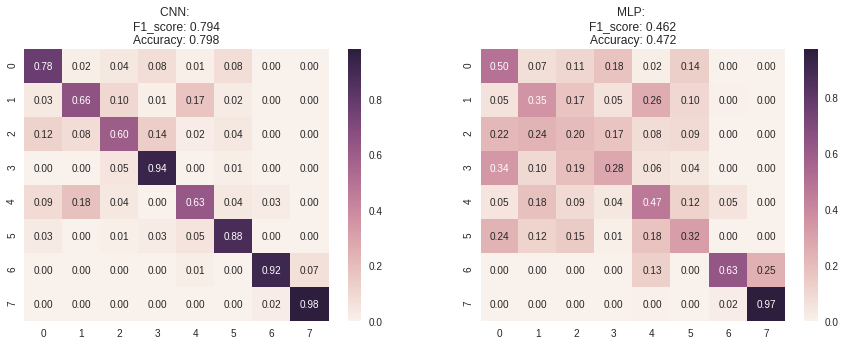

In [0]:
compare_mlp_cnn(resnet, mlp, X_test, y_test)

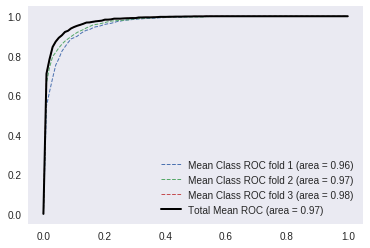

In [0]:
from sklearn.metrics import roc_curve, auc
from scipy import interp


kfold = KFold(n_splits=3, shuffle=True, random_state=15).split(X)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(kfold):
    y_train_ohe = pd.get_dummies(y[train]).reset_index(drop=True)
    y_test_ohe = pd.get_dummies(y[test]).reset_index(drop=True)
    
    resnet3 = resnet_model()
    resnet3.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy',f1_score])

    resnet3.fit(X[train], y_train_ohe, batch_size=128, 
                      epochs=50, verbose=0,
                      validation_data=(X[test], y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )
    probas= resnet3.predict(X[test])
    
    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y[test])
    
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= 3
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.legend(loc='best')
plt.grid()

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.2 µs
CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs
CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs


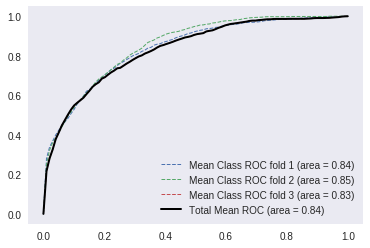

In [0]:
kfold3 = KFold(n_splits=3, shuffle=True, random_state=15).split(X)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []



for i, (train, test) in enumerate(kfold3):
    y_train_ohe = pd.get_dummies(y[train]).reset_index(drop=True)
    y_test_ohe = pd.get_dummies(y[test]).reset_index(drop=True)
    
    mlp2 = mlp_mod()
    mlp2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy', f1_score])

    mlp2.fit(X[train], y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)

    probas= mlp2.predict(X[test])
    
    perclass_mean_tpr = 0.0
    roc_auc = 0
    classes = np.unique(y[test])
    
    # get the mean fpr and tpr, per class
    for j in classes:
        fpr, tpr, thresholds = roc_curve(y[test],
                                         probas[:, j],
                                         pos_label=j)
        perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
        perclass_mean_tpr[0] = 0.0
        roc_auc += auc(fpr, tpr)
        
    perclass_mean_tpr /= len(classes)
    roc_auc /= len(classes)
    mean_tpr += perclass_mean_tpr
    plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
    
mean_tpr /= 3
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
plt.legend(loc='best')
plt.grid()

In [0]:
auc_resnet = [0.96, 0.97, 0.98]
auc_mlp = [0.84, 0.85, 0.83]

from scipy.stats import t
# define probability
p = 0.975
df = 3-1
# retrieve probability to value
value= t.ppf(p, df)


t = value/np.sqrt(3)
e = np.array(auc_resnet)-np.array(auc_mlp)
stdtot = np.std(e)
dbar = np.mean(e)
print('Range of: ', dbar - t*stdtot,dbar+t*stdtot )
print('Since the CI does not contain 0, we say the difference is statistically significant.')

Range of:  0.09486898757108095 0.16513101242891906
Since the CI does not contain 0, we say the difference is statistically significant.


Based on  a t-test comparing the AUC of each model, the classifiers perform significantly different from each other with 95% confidence. ResNet has a higher F1-score, accuracy, and AUC than MLP, so we conclude that ResNet performs better on this dataset than the MLP.

# **Exceptional Work (10 points total) **

**You have free reign to provide additional analyses. One idea (required for 7000 level students): Use transfer learning to pre-train the weights of your initial layers of your CNN. Compare the performance when using transfer learning to training from scratch in terms of classification performance.**

Because the ResNet50 requires the dataset with 3 inputs channels,  and width and height should be no smaller than 32. Our dataset used in previous section is greyscale, so we will use the color images provided from our data in this section instead. Each row of the new color images datasets represents an RGB image with the size of 28x28x3.  Since the inputs should have the width and height larger than 32, we resize the images into 64x64x3.

In [0]:
import pandas as pd
data_col = pd.read_csv('/content/hmnist_28_28_RGB.csv', header=0, sep=',', quotechar='"')
data_col.shape

(5000, 2353)

In [0]:
X2=data_col.copy()
del X2["label"]

# normalize inputs from 0-255 to -0.5 to 0.5
X2 = X2.astype('float32')
X2 = X2 / 255.0 - 0.5

In [0]:
import numpy as np
img_wh2=28
X2=np.asarray(X2)

# NEW: Let's start by fixing the sizes
X2 = X2.reshape((-1,img_wh2,img_wh2,3))
# the image data has been resized to (samples,image_rows,image_cols,image_channels)

print('New Shape: Rows: %d, image size: (%d,%d,%d)' % (X2.shape[0], X2.shape[1], X2.shape[2], X2.shape[3] ))

New Shape: Rows: 5000, image size: (28,28,3)


In [0]:
#y data with labels
y2=data_col["label"].copy()
from sklearn.preprocessing import LabelEncoder
import numpy as np

# define objects that can encode each variable as integer    
encoders = dict() 
col='label'

# train all encoders 
# integer encoded variables
encoders = LabelEncoder() # save the encoder
data_col[col+'_int'] = encoders.fit_transform(data_col[col])
y2=data_col[col+'_int']
# add one hot encoding the output values
y_ohe2 = pd.get_dummies(y2)
y_ohe2.head()

,0,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [0]:
import numpy as np

#image classes
NUM_CLASSES = 8 
class_names = ['tumor','stroma','complex','lympho',
               'debris','mucosa','adipose','background']
class_names = np.asarray(class_names)

In [0]:
#using kfold for cv 
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True, random_state=15)  #15 
kf.get_n_splits(X2,y_ohe2)

print(kf)

for train_index, test_index in kf.split(X2,y_ohe2):
    X_train2, X_test2 = X2[train_index], X2[test_index]
    y_train_ohe2, y_test_ohe2 = y2[train_index], y2[test_index]
    
    y_train2, y_test2 = y2[train_index], y2[test_index]
    
    y_train_ohe2 = pd.get_dummies(y_train_ohe2)
    y_test_ohe2 = pd.get_dummies(y_test_ohe2)
    


KFold(n_splits=3, random_state=15, shuffle=True)


In [0]:
%%time

# manipulated from Keras Documentation
#  https://keras.io/applications/
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

#using pre-trained resnet model on the ImageNet data
res_model = ResNet50(weights='imagenet',include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 5s 0us/step
CPU times: user 10.3 s, sys: 807 ms, total: 11.2 s
Wall time: 16.1 s


In [0]:
from scipy.misc import imresize
import numpy as np


x_train_up = [imresize(x, size=(64,64,3), interp='nearest') for x in X_train2]
x_train_up = np.stack(x_train_up, axis=0)
print(x_train_up.shape)

x_test_up = [imresize(x, size=(64,64,3), interp='nearest') for x in X_test2]
x_test_up = np.stack(x_test_up, axis=0)
print(x_test_up.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


(3334, 64, 64, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


(1666, 64, 64, 3)


In [0]:
x_train_up=preprocess_input(x_train_up)
x_test_up=preprocess_input(x_test_up)

In [0]:
x_train_resnet=res_model.predict(x_train_up)
x_test_resnet=res_model.predict(x_test_up)

In [0]:
# let's add a fully-connected layer
input_x = Input(shape=x_train_resnet[0].shape)
x = Flatten()(input_x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu',kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
# and a fully connected layer 
predictions = Dense(NUM_CLASSES, activation='softmax', kernel_initializer='glorot_uniform')(x)

model_TL = Model(inputs=input_x, outputs=predictions)

model_TL.summary()

model_TL.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy',f1_score])

model_TL.fit(x_train_resnet,y_train_ohe2,epochs=5,
          batch_size=128,verbose=1,
         validation_data=(x_test_resnet, y_test_ohe2))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 2, 2, 2048)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 8192)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 2056      
Total params: 2,099,464
Trainable params: 2,099,464
Non-trainable params: 0
_________________________________________________________________


F1_score: 0.854
Accuracy: 0.853


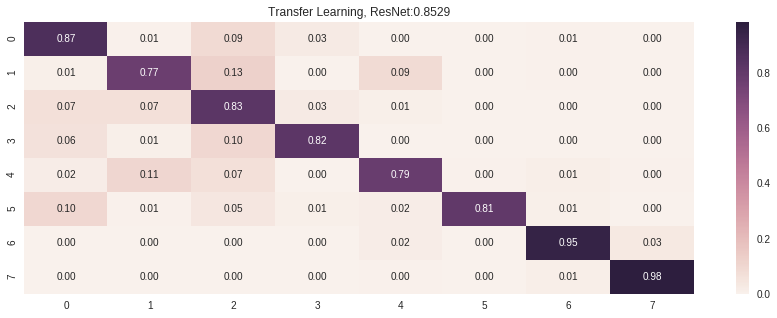

In [0]:
summarize_net(model_TL, x_test_resnet, y_test2, title_text='Transfer Learning, ResNet:')

[[1201  119]
 [ 220  126]]
chi-squared: 29.49852507374631
p-value: 5.595927133392349e-08


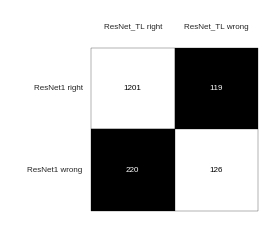

In [0]:
#Code from http://rasbt.github.io/mlxtend/user_guide/evaluate/mcnemar/

#McNemar Test

import numpy as np
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

resnet=resnet_model()

resnet.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='adam', # 'adadelta' 'rmsprop'
                metrics=['accuracy',f1_score])

resnet.fit(X_train, y_train_ohe, batch_size=128, 
                      epochs=50, verbose=0,
                      validation_data=(X_test, y_test_ohe),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=4)]
                     )

# Class labels predicted by model 1
yhat_TL = np.argmax(model_TL.predict(x_test_resnet), axis=1)

# Class labels predicted by model 2
yhat_res = np.argmax(resnet.predict(X_test), axis=1)

tb = mcnemar_table(y_target=y_test, 
                   y_model1=yhat_TL, 
                   y_model2=yhat_res)

print(tb)

chi2, p = mcnemar(ary=tb, corrected=True)
print('chi-squared:', chi2)
print('p-value:', p)


brd = checkerboard_plot(tb,
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['ResNet_TL right', 'ResNet_TL wrong'],
                        row_labels=['ResNet1 right', 'ResNet1 wrong'])
plt.show()

According to the McNemar Test, we can reject the null hypothesis that the two models perform equally well on this dataset at a significance level of alpha=0.05. We conclude that using transfer learning (ResNet50) model performs better on this dataset. 